In [35]:
!pip install tensorflow-gpu

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
!nvidia-smi

Sun Apr 11 09:59:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |   1274MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:
import tensorflow as tf

# **Import the libraries**

In [39]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout,Input, Lambda

# from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications import EfficientNetB7


from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [40]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.4.1


In [41]:
size = 32
model_name  = 'handwrittern bangla letter32 EfficientNetB7.h5'
batch_size = 16
IMAGE_SIZE = [size,size ]
path = '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/'

train_path = path + 'Train'
test_path = path + 'Test'

In [42]:

folders = glob(train_path + '/*')

folders

['/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/177',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/175',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/172',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/176',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/180',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/173',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/181',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/174',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/179',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/178',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/186',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/182',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/191',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/190',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/1

In [43]:
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,),classes=50,pooling='avg') 
model_d=EfficientNetB7(include_top=False, weights='imagenet',input_shape=(size, size, 3,),classes=50) 
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(len(folders),activation='softmax')(x) #FC-layer

In [44]:
model = Model(inputs=model_d.input, outputs=preds)
# model.summary()

In [45]:
# don't train existing weights
# for layer in model.layers:
#     layer.trainable = False


# for layer in model.layers[:-8]:
#     layer.trainable=False
    
# for layer in model.layers[-8:]:
#     layer.trainable=True

In [46]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 32, 32, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 32, 32, 3)    7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization_2[0][0]            
____________________________________________________________________________________________

In [47]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights= True,verbose=1,mode='auto')
checkpoint = ModelCheckpoint(model_name, verbose=1, save_best_only=True)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [48]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 12010 images belonging to 50 classes.


In [49]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (size, size),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 3050 images belonging to 50 classes.


In [50]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set, 
  epochs=100,
  steps_per_epoch=len(training_set),
  callbacks=[anne, checkpoint,earlyStopping],
  validation_steps=len(test_set)
)

Epoch 1/100
751/751 [==============================] - 5760s 8s/step - loss: 4.5791 - accuracy: 0.0254 - val_loss: 4.0690 - val_accuracy: 0.0308

Epoch 00001: val_loss improved from inf to 4.06900, saving model to handwrittern bangla letter32 EfficientNetB7.h5
Epoch 2/100
751/751 [==============================] - 155s 207ms/step - loss: 4.0810 - accuracy: 0.0515 - val_loss: 3.4878 - val_accuracy: 0.0584

Epoch 00002: val_loss improved from 4.06900 to 3.48779, saving model to handwrittern bangla letter32 EfficientNetB7.h5
Epoch 3/100
751/751 [==============================] - 155s 207ms/step - loss: 3.6330 - accuracy: 0.0925 - val_loss: 4.2245 - val_accuracy: 0.0400

Epoch 00003: val_loss did not improve from 3.48779
Epoch 4/100
751/751 [==============================] - 155s 207ms/step - loss: 3.3785 - accuracy: 0.1102 - val_loss: 15.2562 - val_accuracy: 0.0426

Epoch 00004: val_loss did not improve from 3.48779
Epoch 5/100
751/751 [==============================] - 154s 205ms/step - 

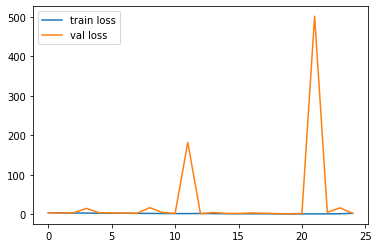

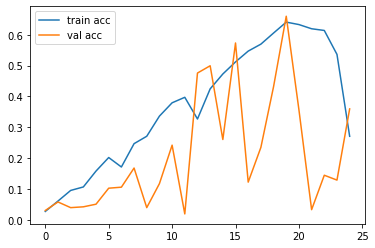

<Figure size 432x288 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [52]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save(model_name)

In [53]:
y_pred = model.predict(test_set)
y_pred

array([[2.75732689e-02, 7.38100475e-03, 9.02328000e-04, ...,
        1.00879777e-06, 1.61055354e-07, 5.27083739e-06],
       [1.34235469e-03, 1.21326935e-04, 1.51803531e-02, ...,
        2.55172548e-04, 5.20495640e-04, 5.70784214e-05],
       [9.75460932e-03, 8.18029221e-04, 1.93136837e-03, ...,
        4.71625171e-05, 7.25718201e-06, 7.17501447e-04],
       ...,
       [3.02067638e-04, 1.82097574e-04, 2.57485872e-03, ...,
        1.36978528e-03, 1.63232314e-03, 1.77606726e-05],
       [6.28380338e-04, 1.36801289e-04, 7.20389485e-02, ...,
        3.16046135e-05, 8.67575509e-05, 3.31319507e-06],
       [5.49167671e-05, 2.35989428e-05, 4.30200278e-04, ...,
        3.95240313e-05, 5.74621488e-04, 1.13935687e-06]], dtype=float32)

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model(model_name)
new_model = tf.keras.models.load_model(model_name)

# Check its architecture
new_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 32, 32, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 32, 32, 3)    7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization_2[0][0]            
____________________________________________________________________________________________

In [55]:
loss, acc = new_model.evaluate(test_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print('Restored model, loss: {:5.2f}%'.format(100 * loss))


191/191 - 14s - loss: 1.5958 - accuracy: 0.6597
Restored model, accuracy: 65.97%
Restored model, loss: 159.58%
